# Stat 593 : Robust Statistics
##  Robustness and linear models
### *Joseph Salmon* (with some help from Mathurin Massias)


In [1]:
import sys
sys.path.append("./../../../")
from random import shuffle, seed
from share_code.utils import plt, sns, my_saving_display

import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import rc
from sklearn import linear_model
from sklearn.preprocessing import scale
import matplotlib.animation as animation
from matplotlib.ticker import MaxNLocator

%matplotlib inline
from IPython.display import HTML

/home/jo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Plot initialization


In [2]:
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]
my_blue = color_blind_list[0]
brown = (0.64, 0.16, 0.16)

dirname = "../prebuiltimages/"
imageformat = ".pdf"  # should be .pdf or .png
saving = True # True

# Toys examples: outliers with regression models
(extracted from Rousseuw and Leroy (1987)

# Load data: first toy example; y corruption case

In [3]:
toy_data_X1 = np.array([1, 2, 3, 4, 5]).reshape(5, 1)
toy_data_y1 = np.array([2, 1.65, 1.55, 1.45 , 1.2])
X_to_predict_toy1 = np.linspace(0.0, 7, num=50).reshape(50, 1)
X_to_predict_toy1 = pd.DataFrame(X_to_predict_toy1, columns=['y-axis'])

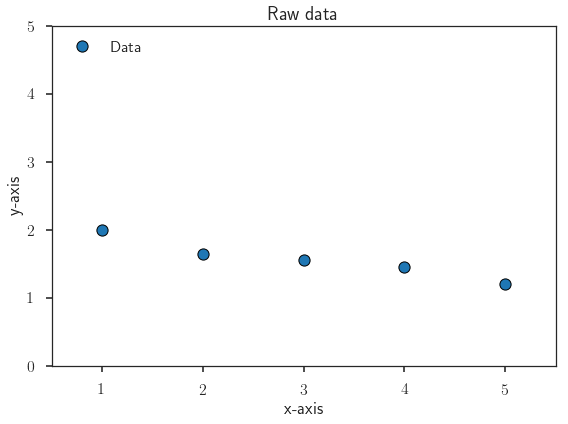

In [4]:
xlabels = 'x-axis'
ylabels = 'y-axis'

fig1 = plt.figure(figsize=(8, 6))
plt.xlabel(xlabels)
plt.ylabel(ylabels)
plt.title('Raw data')
plt.plot(toy_data_X1, toy_data_y1, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
axes = plt.gca()
plt.xlim(xmin=0.5, xmax=5.5)
plt.ylim(ymin=0, ymax=5)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig1, dirname, "toy1_raw", imageformat)

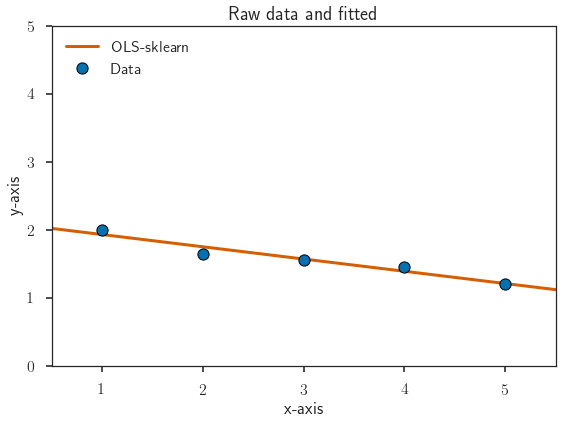

In [5]:
# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(toy_data_X1, toy_data_y1)

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0.5, xmax=5.5)
plt.ylim(ymin=0, ymax=5)

plt.plot(X_to_predict_toy1, skl_linmod.predict(X_to_predict_toy1),
         linewidth=3, color=my_orange, label="OLS-sklearn")
plt.plot(toy_data_X1, toy_data_y1, 'o', label="Data",
         markeredgecolor='k', markeredgewidth=1, color=my_blue)
plt.plot(4,)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig, dirname, "toy1_raw_n_OLS", imageformat)

In [6]:
# Adding corruption
toy_data_damaged_y1 = np.array([2, 1.65, 1.55, 4.5, 1.2])

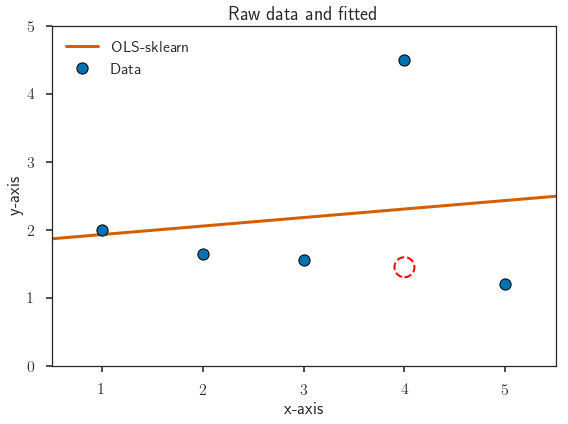

In [7]:
# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(toy_data_X1, toy_data_damaged_y1)

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0.5, xmax=5.5)
plt.ylim(ymin=0, ymax=5)

plt.plot(X_to_predict_toy1, skl_linmod.predict(X_to_predict_toy1),
         linewidth=3, color=my_orange, label="OLS-sklearn")
plt.plot(toy_data_X1, toy_data_damaged_y1, 'o', label="Data",
         markeredgecolor='k', markeredgewidth=1, color=my_blue)

plt.scatter(toy_data_X1[3,],toy_data_y1[3], s=400, facecolors='none', edgecolors='r',
            linestyle='--',linewidth=2)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig, dirname, "toy1_raw_n_OLS_damaged", imageformat)

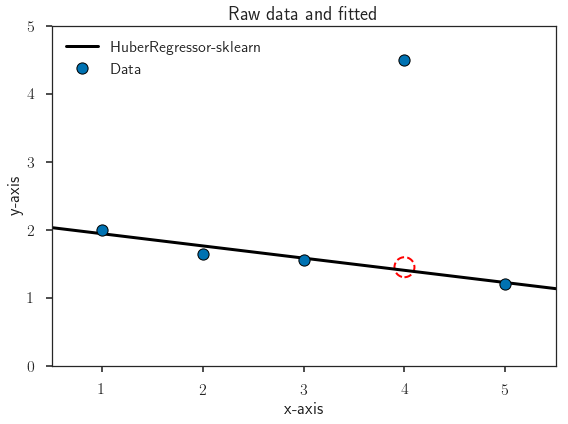

In [8]:

# Fit regression model (with sklearn)
skl_linmod = linear_model.HuberRegressor()
skl_linmod.fit(toy_data_X1, toy_data_damaged_y1)

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0.5, xmax=5.5)
plt.ylim(ymin=0, ymax=5)

plt.plot(X_to_predict_toy1, skl_linmod.predict(X_to_predict_toy1),
         linewidth=3, color='k', label="HuberRegressor-sklearn")
plt.plot(toy_data_X1, toy_data_damaged_y1, 'o', label="Data",
         markeredgecolor='k', markeredgewidth=1, color=my_blue)

plt.scatter(toy_data_X1[3,],toy_data_y1[3], s=400, facecolors='none', edgecolors='r',
            linestyle='--',linewidth=2)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig, dirname, "toy1_raw_n_Huber_damaged", imageformat)

# Load data: second toy example; x corruption case

In [9]:
toy_data_X2 = np.array([0.4, 0.8, 1.2, 1.6, 2.0]).reshape(5, 1)
toy_data_y2 = np.array([1.2, 1.98, 2.6, 3.21 , 3.92])
X_to_predict_toy2 = np.linspace(0.0, 7, num=50).reshape(50, 1)
X_to_predict_toy2 = pd.DataFrame(X_to_predict_toy2, columns=['y-axis'])

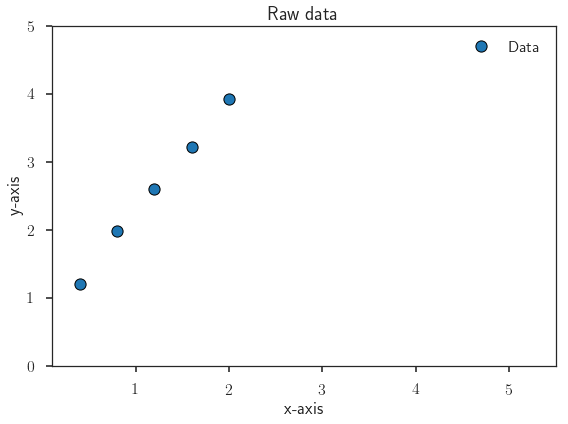

In [10]:
xlabels = 'x-axis'
ylabels = 'y-axis'

fig1 = plt.figure(figsize=(8, 6))
plt.xlabel(xlabels)
plt.ylabel(ylabels)
plt.title('Raw data')
plt.plot(toy_data_X2, toy_data_y2, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
axes = plt.gca()
plt.xlim(xmin=0.1, xmax=5.5)
plt.ylim(ymin=0, ymax=5)

plt.legend(numpoints=1, loc=1)  # numpoints = 1 for nicer display
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig1, dirname, "toy2_raw", imageformat)

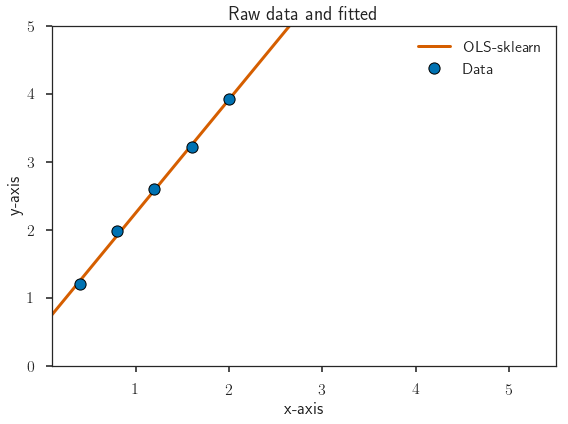

In [11]:
# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(toy_data_X2, toy_data_y2)

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0.1, xmax=5.5)
plt.ylim(ymin=0, ymax=5)

plt.plot(X_to_predict_toy2, skl_linmod.predict(X_to_predict_toy2),
         linewidth=3, color=my_orange, label="OLS-sklearn")
plt.plot(toy_data_X2, toy_data_y2, 'o', label="Data",
         markeredgecolor='k', markeredgewidth=1, color=my_blue)
plt.plot(4,)

plt.legend(numpoints=1, loc=1)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig, dirname, "toy2_raw_n_OLS", imageformat)

In [12]:
# toy_data_X2 = np.array([0.4, 0.8, 1.2, 1.6, 2.0]).reshape(5, 1)
# toy_data_y2 = np.array([1.2, 1.98, 2.6, 3.21 , 3.92])

toy_data_damaged_X2 = np.array([0.8, 1.2, 1.6, 2.0, 4.8]).reshape(5, 1)
toy_data_damaged_y2 = np.array([1.98, 2.6, 3.21 , 3.92, 1.2])

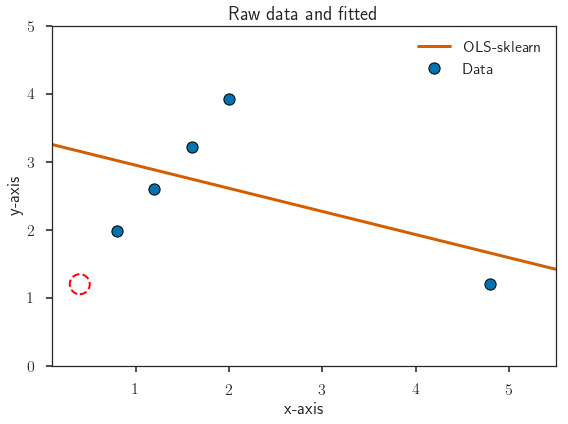

In [13]:
# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(toy_data_damaged_X2, toy_data_damaged_y2)

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0.1, xmax=5.5)
plt.ylim(ymin=0, ymax=5)

plt.plot(X_to_predict_toy1, skl_linmod.predict(X_to_predict_toy1),
         linewidth=3, color=my_orange, label="OLS-sklearn")
plt.plot(toy_data_damaged_X2, toy_data_damaged_y2, 'o', label="Data",
         markeredgecolor='k', markeredgewidth=1, color=my_blue)

plt.scatter(toy_data_X2[0,],toy_data_y2[0], s=400, facecolors='none', edgecolors='r',
            linestyle='--',linewidth=2)

plt.legend(numpoints=1, loc=1)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig, dirname, "toy2_raw_n_OLS_damaged", imageformat)

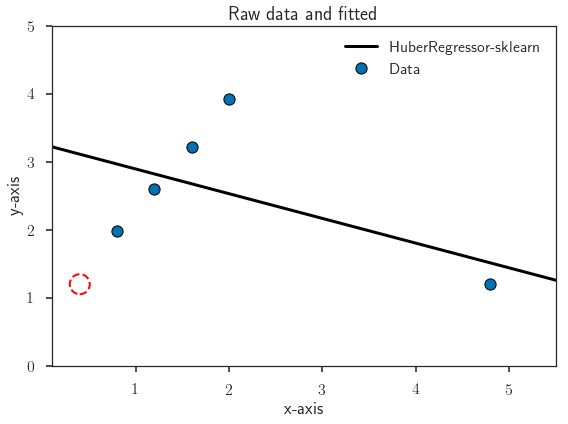

In [14]:
# Fit regression model (with sklearn)
skl_linmod = linear_model.HuberRegressor()
skl_linmod.fit(toy_data_damaged_X2, toy_data_damaged_y2)

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0.1, xmax=5.5)
plt.ylim(ymin=0, ymax=5)

plt.plot(X_to_predict_toy1, skl_linmod.predict(X_to_predict_toy1),
         linewidth=3, color='k', label="HuberRegressor-sklearn")
plt.plot(toy_data_damaged_X2, toy_data_damaged_y2, 'o', label="Data",
         markeredgecolor='k', markeredgewidth=1, color=my_blue)

plt.scatter(toy_data_X2[0,],toy_data_y2[0], s=400, facecolors='none', edgecolors='r',
            linestyle='--',linewidth=2)

plt.legend(numpoints=1, loc=1)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig, dirname, "toy2_raw_n_Huber_damaged", imageformat)

In [15]:
# Fit regression model (with LTS)
# obtained with priceless help from Olivier Grisel
# rpy2 is available via pip: pip install rpy2
from rpy2 import robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects import numpy2ri
from rpy2.robjects import pandas2ri

numpy2ri.activate()
pandas2ri.activate()

utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)  # select the first mirror in the list
if not rpackages.isinstalled('robustbase'):
    utils.install_packages("robustbase")
ltsReg = rpackages.importr('robustbase')

ltsReg = robjects.r['ltsReg']
ltsReg_fit = ltsReg(toy_data_damaged_X2, toy_data_damaged_y2)
ltsReg_fit_dict = dict(zip(ltsReg_fit.names, list(ltsReg_fit)))
print("returned values: ", ltsReg_fit_dict.keys())

as_matrix = robjects.r['as']

# getting coefs:
raw_coef = robjects.r.coef(ltsReg_fit)
coefs = np.array(as_matrix(raw_coef, "matrix"))

# getting some other results:
# beta_0 = np.array(as_matrix(ltsReg_fit_dict["intercept"], "matrix"))


returned values:  dict_keys(['alpha', 'raw.weights', 'best', 'raw.coefficients', 'quan', 'raw.scale', 'raw.resid', 'coefficients', 'scale', 'resid', 'crit', 'rsquared', 'method', 'intercept', 'RD', 'lts.wt', 'residuals', 'fitted.values', 'Y', 'X', 'raw.cnp2', 'cnp2', 'call'])


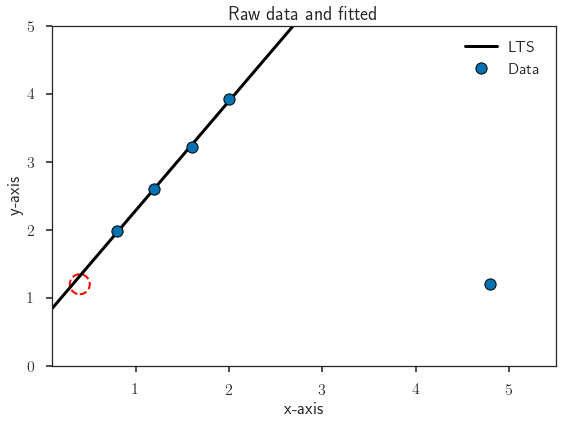

In [16]:
fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0.1, xmax=5.5)
plt.ylim(ymin=0, ymax=5)

plt.plot(X_to_predict_toy1, coefs[0][0] + coefs[1][0] * X_to_predict_toy1,linewidth=3, color='k', label="LTS")
plt.plot(toy_data_damaged_X2, toy_data_damaged_y2, 'o', label="Data",
         markeredgecolor='k', markeredgewidth=1, color=my_blue)

plt.scatter(toy_data_X2[0,],toy_data_y2[0], s=400, facecolors='none', edgecolors='r',
            linestyle='--',linewidth=2)

plt.legend(numpoints=1, loc=1)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig, dirname, "toy2_raw_n_LTS", imageformat)

# Load data

In [17]:
# Original url:
# url = 'https://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/datasets/cars.csv'
# Alternative url:
url = 'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/cars.csv'
dat = pd.read_csv(url)

print(dat.describe())

y = dat['dist']
X = dat[['speed']]  # Beware dat['speed'].shape = (50,), issue with sklearn API
n_sample, _ = X.shape


       Unnamed: 0      speed        dist
count    50.00000  50.000000   50.000000
mean     25.50000  15.400000   42.980000
std      14.57738   5.287644   25.769377
min       1.00000   4.000000    2.000000
25%      13.25000  12.000000   26.000000
50%      25.50000  15.000000   36.000000
75%      37.75000  19.000000   56.000000
max      50.00000  25.000000  120.000000


# Data only

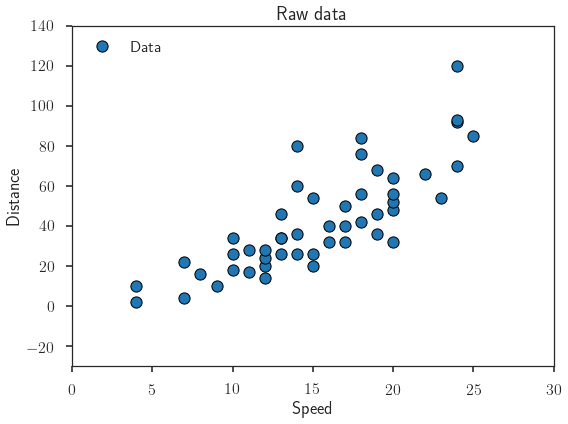

In [18]:
xlabels = 'Speed'
ylabels = 'Distance'

fig1 = plt.figure(figsize=(8, 6))
plt.xlabel(xlabels)
plt.ylabel(ylabels)
plt.title('Raw data')
plt.plot(X, y, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
axes = plt.gca()
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig1, dirname, "cars_data_plot", imageformat)

# Data and OLS estimator

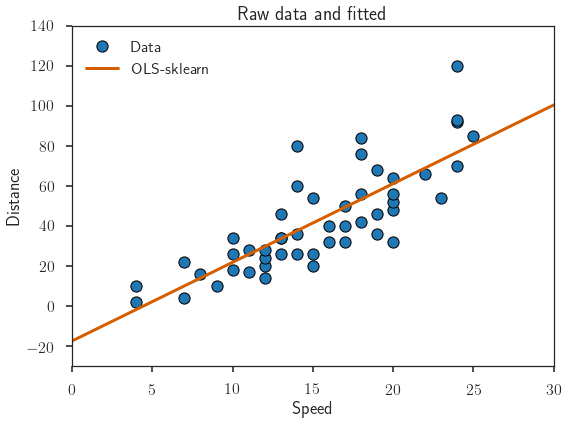

In [19]:
X_with_cst = sm.add_constant(X)
X_to_predict = np.linspace(0.0, 30.0, num=50).reshape(50, 1)
X_to_predict = pd.DataFrame(X_to_predict, columns=['speed'])

# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(X, y)

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)
plt.plot(X, y, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict, skl_linmod.predict(X_to_predict), linewidth=3, color=my_orange,
         label="OLS-sklearn")
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()
plt.legend()
plt.show()

if saving:
    my_saving_display(fig, dirname, "cars_data_plot_regression",
                      imageformat)

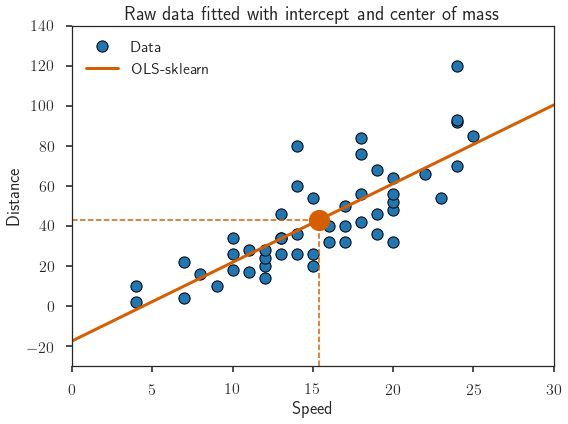

In [20]:
# With intercept and center of mass displayed

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)

plt.plot(X, y, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict, skl_linmod.predict(X_to_predict),
         color=my_orange, linewidth=3, label="OLS-sklearn")
plt.plot(np.mean(X), np.mean(y), 'or', markeredgewidth=10,
         markeredgecolor=my_orange)
plt.plot([np.mean(X), np.mean(X)], [-30, np.mean(y)],
         color=my_orange, linewidth=1.5, linestyle="--")
plt.plot([0, np.mean(X)], [np.mean(y), np.mean(y)], color=my_orange,
         linewidth=1.5, linestyle="--")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data fitted with intercept and center of mass')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig, dirname,
                  "cars_data_plot_regression_intercept_gravity", imageformat)

# With intercept and center of mass displayed + recentering

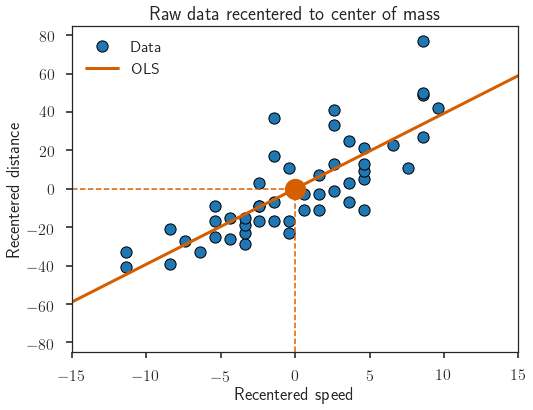

In [21]:
Xprime = X - np.mean(X)
yprime = y - np.mean(y)
fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=-15, xmax=15)
plt.ylim(ymin=-85, ymax=85)
plt.plot(X - np.mean(X), y - np.mean(y), 'o', label="Data",
         markeredgecolor='k', markeredgewidth=1)
skl_linmod.fit(Xprime, yprime)
skl_linmod.predict(X_to_predict)
plt.plot(X_to_predict - 15, skl_linmod.predict(X_to_predict - 15),
         color=my_orange, linewidth=3, label="OLS")
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
plt.plot([0, 0], [-85, 0], color=my_orange, linewidth=1.5,
         linestyle="--")
plt.plot([-15, 0], [0, 0], color=my_orange, linewidth=1.5,
         linestyle="--")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
xlabels = 'Recentered speed'
ylabels = 'Recentered distance'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data recentered to center of mass')
plt.show()

if saving:
    my_saving_display(fig, dirname,
                  "cars_data_plot_regression_gravity_recentered", imageformat)

# Recentered to center of mass + slopes

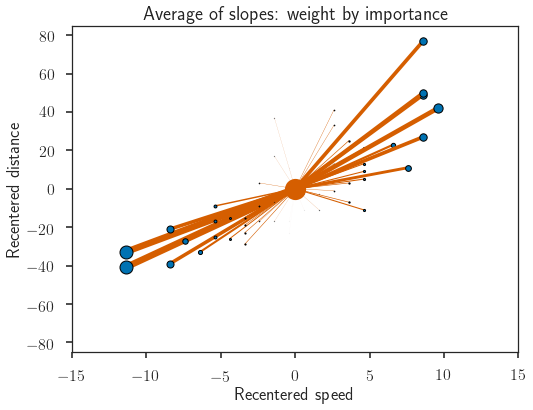

In [22]:

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=-15, xmax=15)
plt.ylim(ymin=-85, ymax=85)
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
xlabels = 'Recentered speed'
ylabels = 'Recentered distance'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Average of slopes: weight by importance')

for i in range(n_sample):
    plt.plot([Xprime.loc[i, 'speed'], 0], [yprime.loc[i], 0], color=my_orange,
             linewidth=(Xprime.loc[i, 'speed']) ** 2 / 20.,
             linestyle="-")
    plt.pause(0.1)
    plt.plot(Xprime.loc[i, 'speed'], yprime.loc[i], 'o',
             markeredgecolor='k', markeredgewidth=1, color=my_blue,
             markersize=(Xprime.loc[i, 'speed']) ** 2 / 10.)
plt.show()

if saving:
    my_saving_display(fig, dirname,
                  "cars_data_plot_regression_gravity_weights", imageformat)

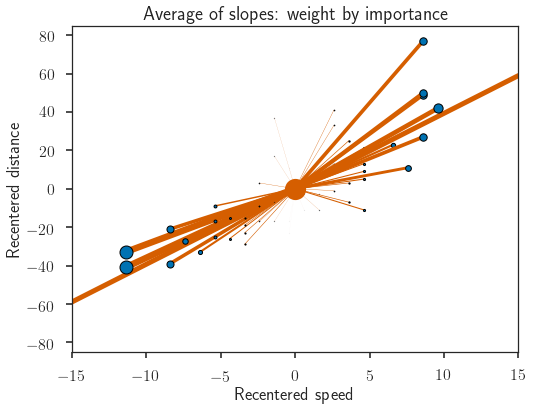

In [23]:
fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=-15, xmax=15)
plt.ylim(ymin=-85, ymax=85)
plt.plot(X_to_predict - 15, skl_linmod.predict(X_to_predict - 15),
         color=my_orange, linewidth=5, label="OLS")
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
for i in range(n_sample):
    plt.plot([Xprime.loc[i, 'speed'], 0], [yprime.loc[i], 0], color=my_orange,
             linewidth=(Xprime.loc[i, 'speed']) ** 2 / 20.,
             linestyle="-")
    # plt.pause(0.01)
    plt.plot(Xprime.loc[i, 'speed'], yprime.loc[i], 'o',
             markeredgecolor='k', markeredgewidth=1, color=my_blue,
             markersize=(Xprime.loc[i, 'speed']) ** 2 / 10.)

xlabels = 'Recentered speed'
ylabels = 'Recentered distance'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Average of slopes: weight by importance')
plt.show()

if saving:
    my_saving_display(fig, dirname,
                  "cars_data_plot_regression_gravity_weights_OLS", imageformat)

# Start Movie

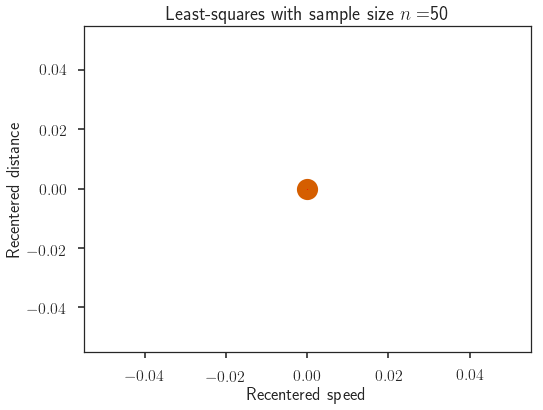

In [24]:
seed(1)
rnd_index = list(range(n_sample))
shuffle(rnd_index)

fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
xlabels = 'Recentered speed'
ylabels = 'Recentered distance'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Least-squares with sample size ' + '$ n=$' + str(i + 1))
plt.show()

# Line and points creation
line, = ax.plot([],[], color=my_orange, linewidth=5, label="OLS")
point, = ax.plot([], [], 'o', label="Data", markeredgecolor='k',
             markeredgewidth=1, color=my_blue)

# Windows size
ax.set_xlim([-15, 15])
ax.set_ylim([-85, 85])

# Create function for each frame
def animate(i):
    y_small = yprime[rnd_index[0:i + 1]]
    X_small = Xprime.iloc[rnd_index[0:i + 1]]
    skl_linmod.fit(X_small, y_small)
    line.set_data(X_to_predict - 15, skl_linmod.predict(X_to_predict - 15))
    point.set_data(X_small, y_small)
    ax.set_title('Least-squares with sample size ' + '$ n=$' + str(i + 1))
    return line, point

# Save animation in ani
ani = animation.FuncAnimation(fig=fig, func=animate, frames=50, interval=100, blit=True)
plt.show()

In [25]:
HTML(ani.to_html5_video())  # Need ffmpeg installed on your machine

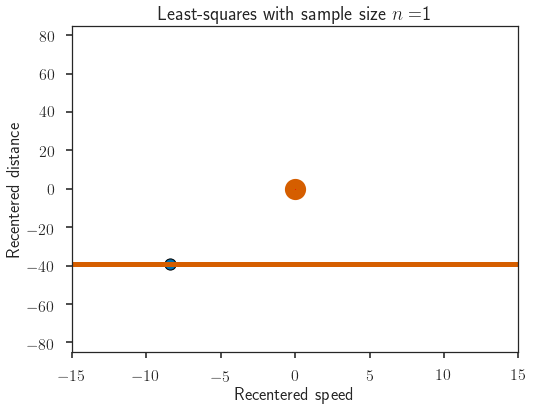

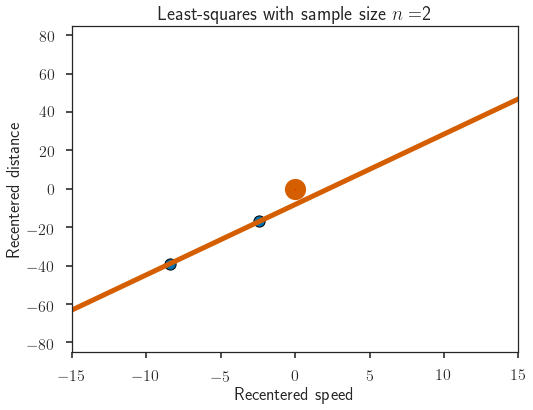

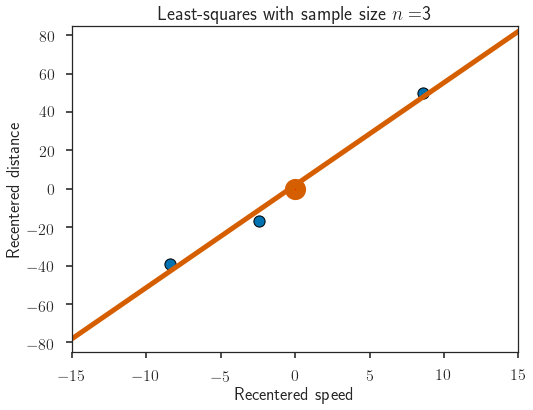

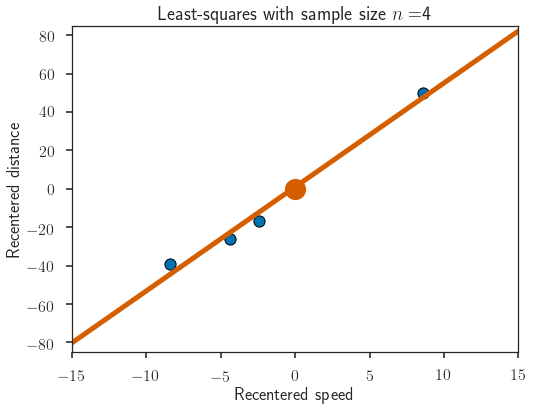

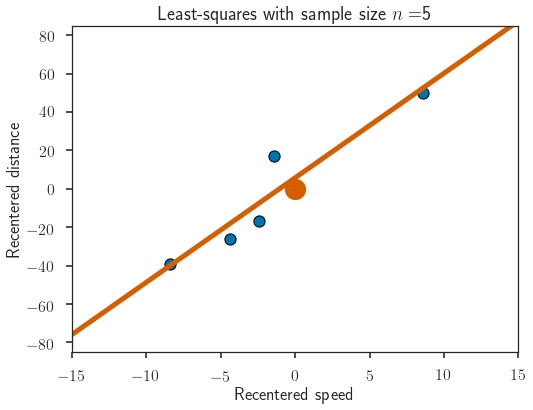

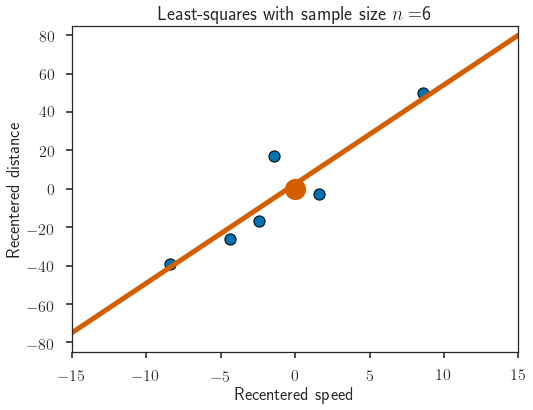

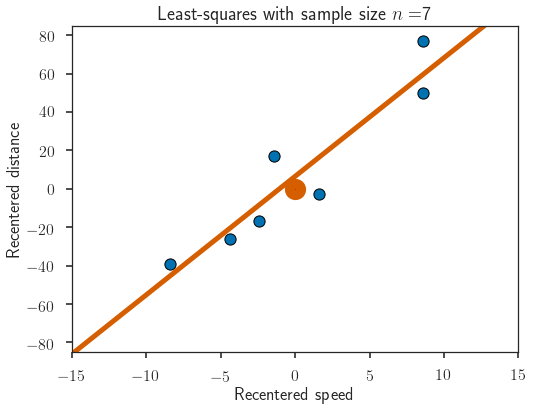

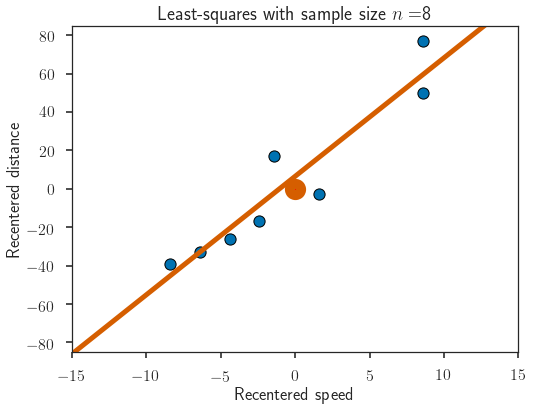

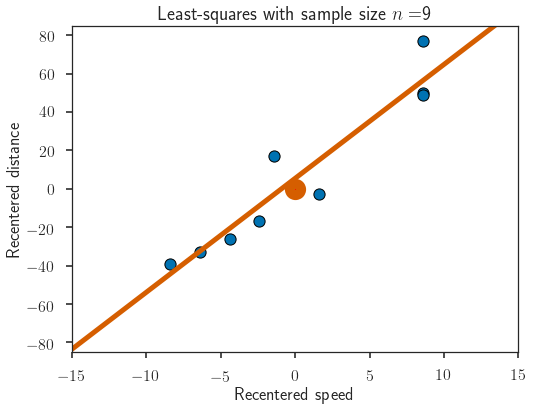

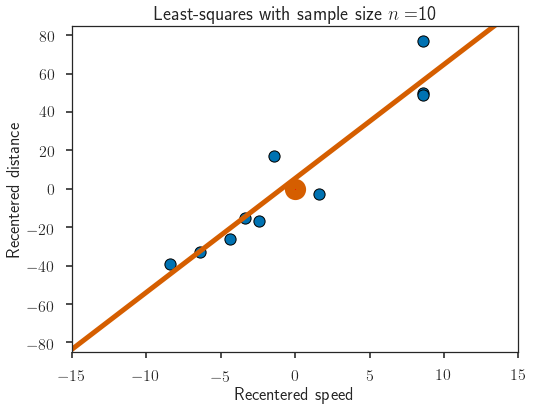

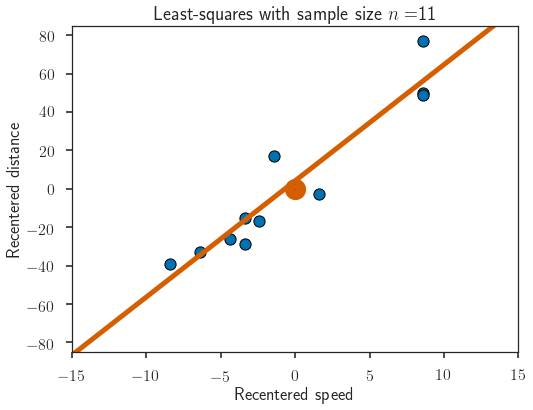

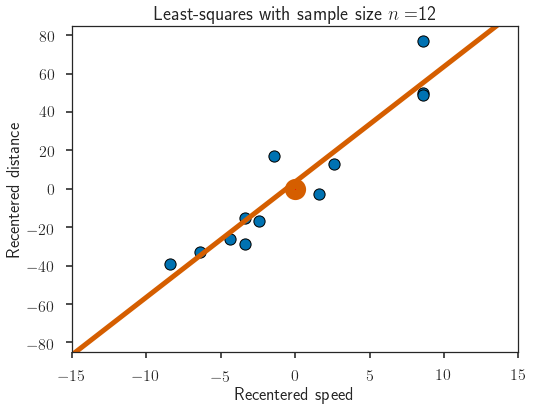

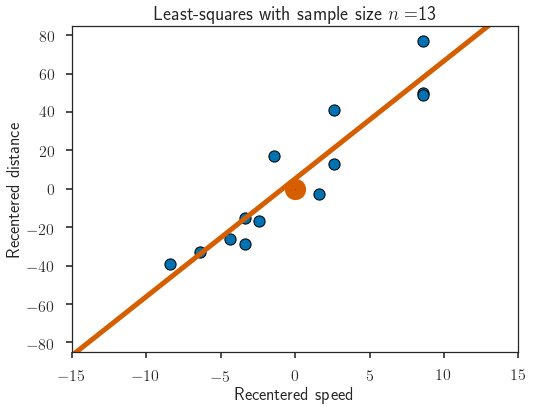

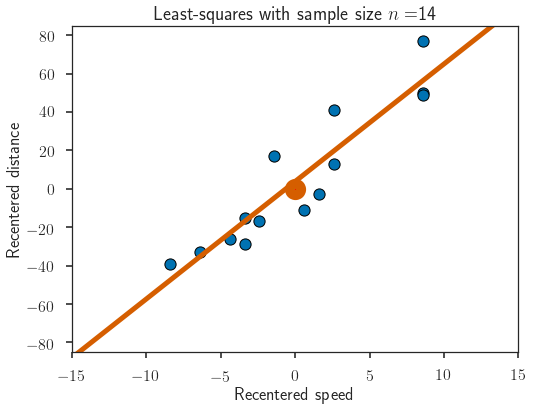

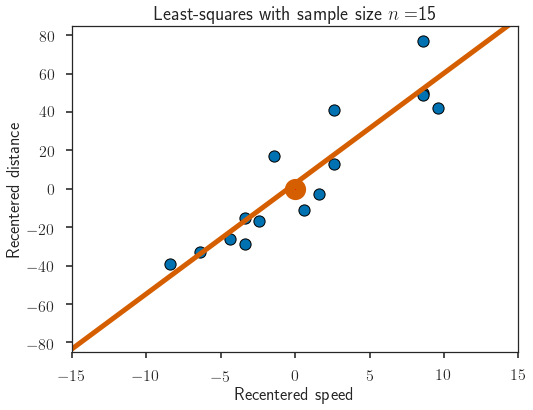

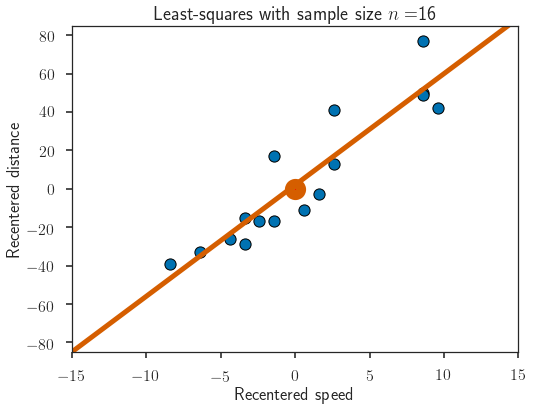

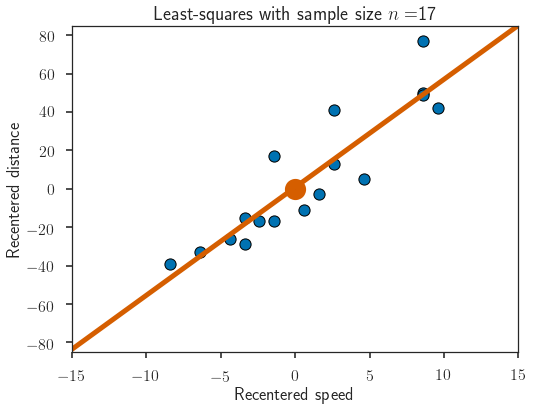

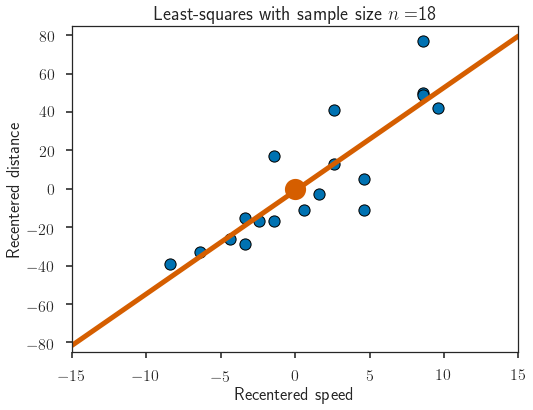

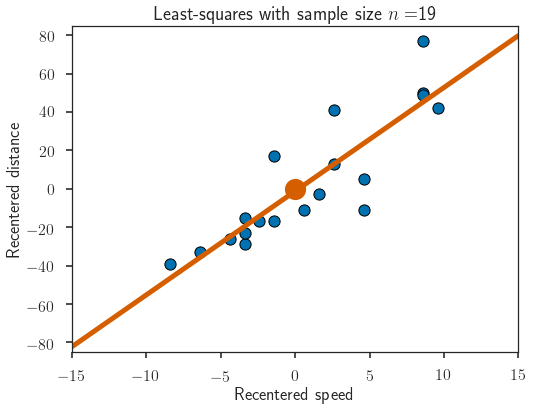

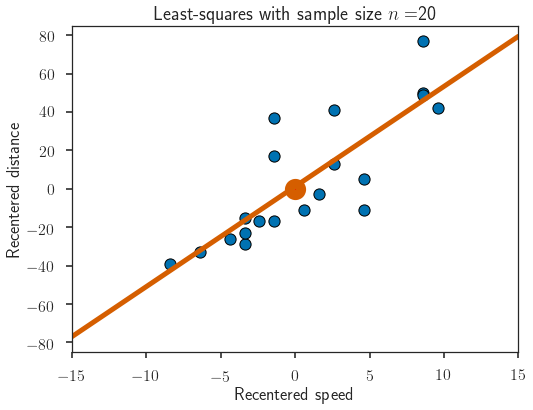

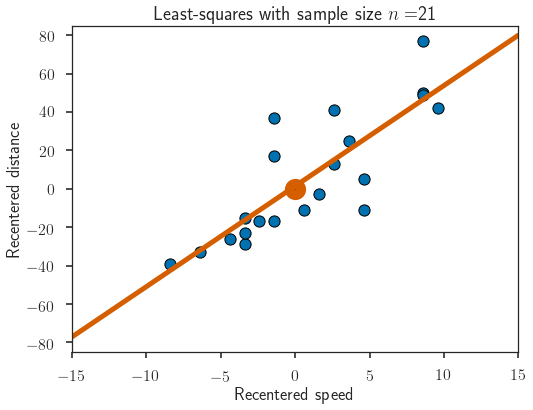

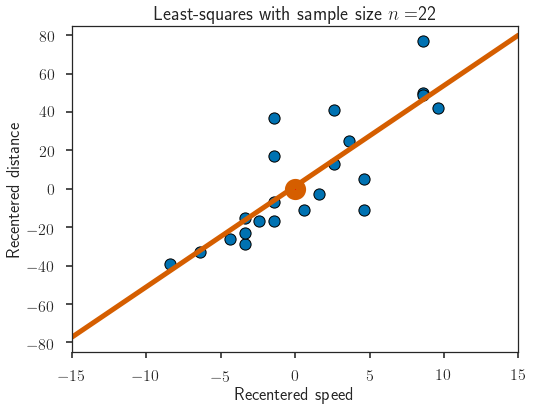

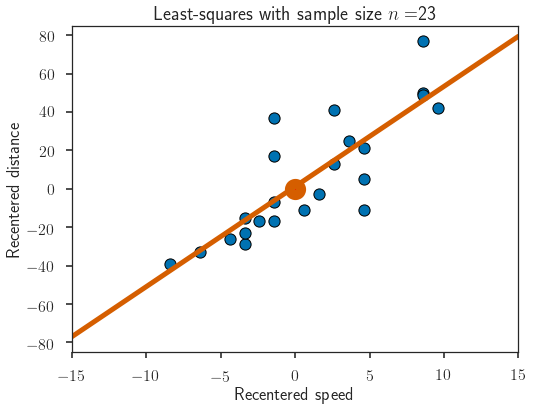

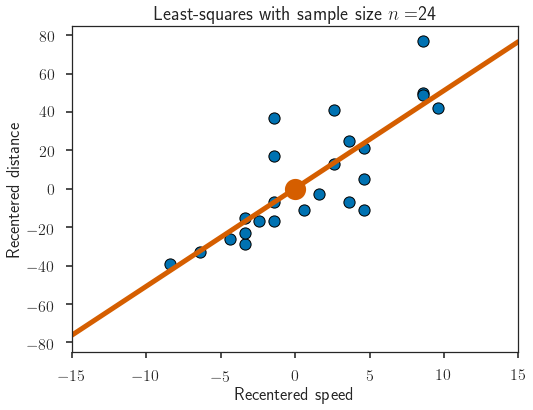

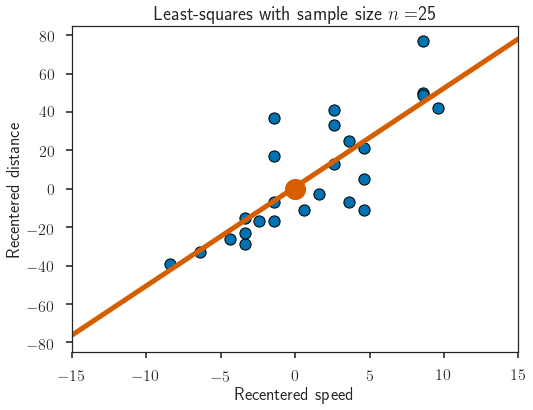

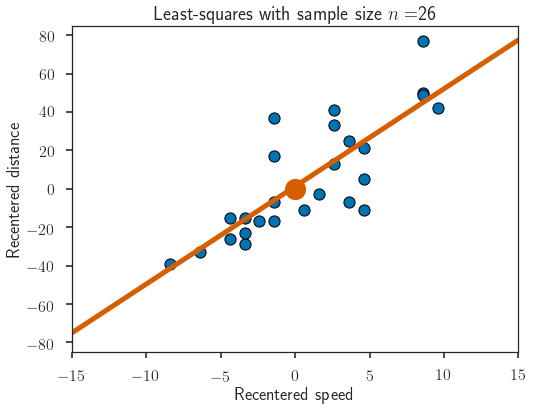

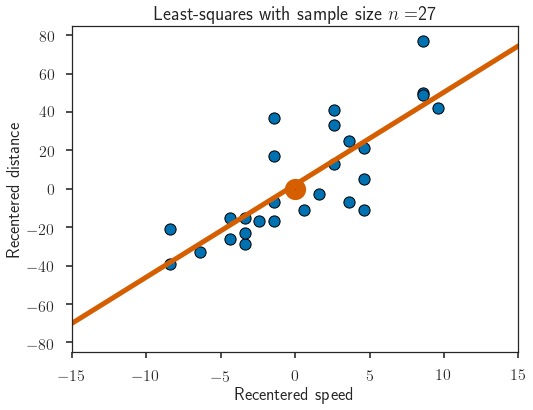

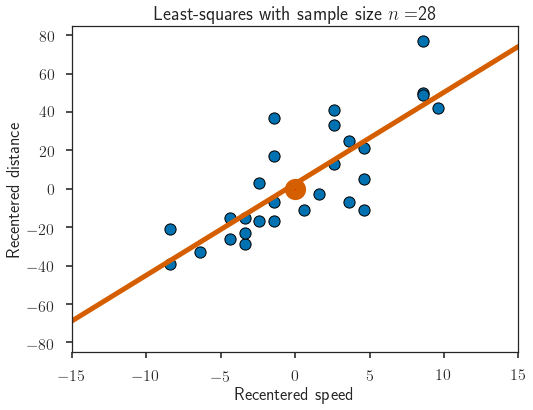

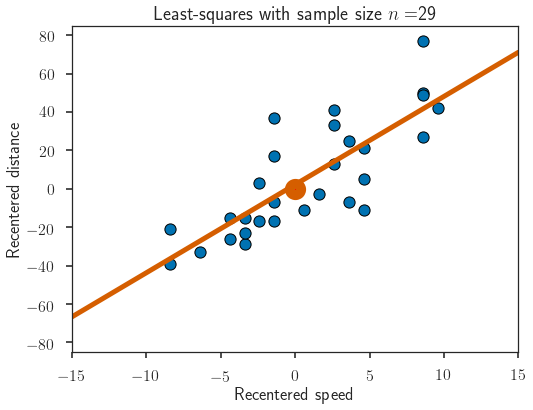

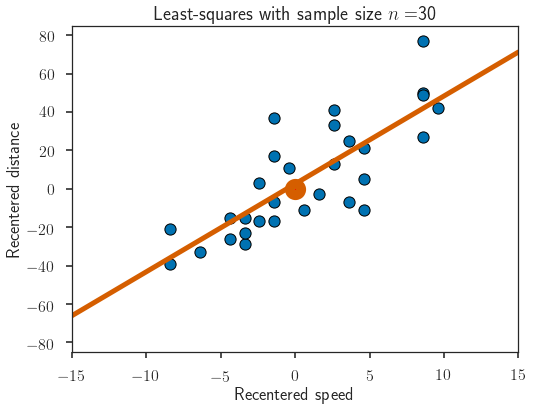

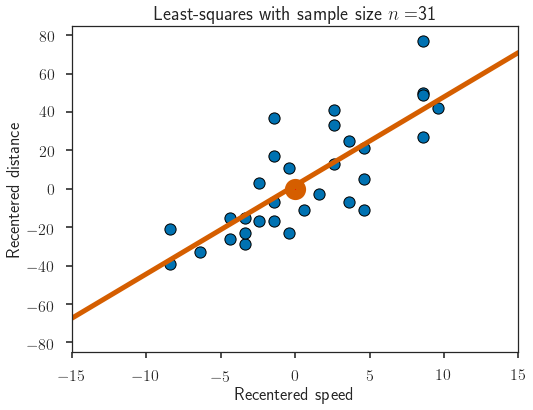

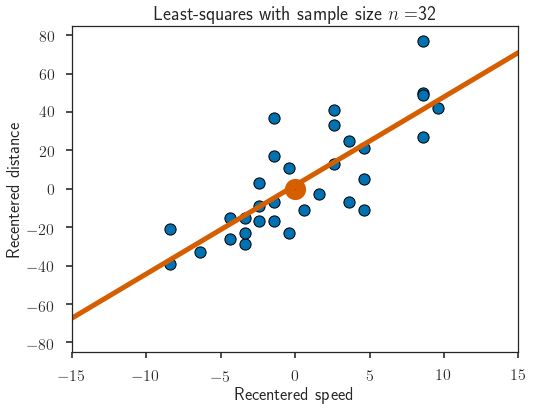

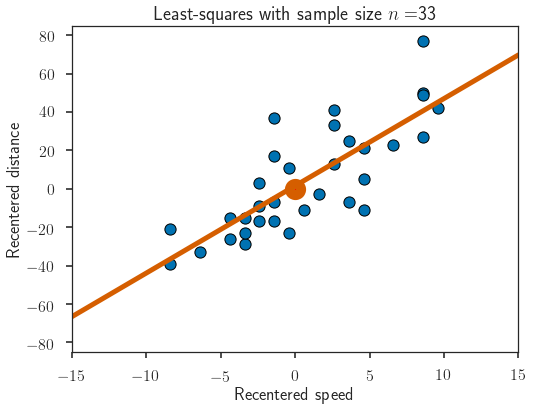

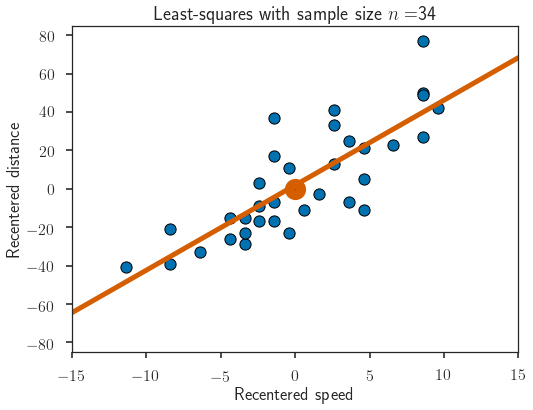

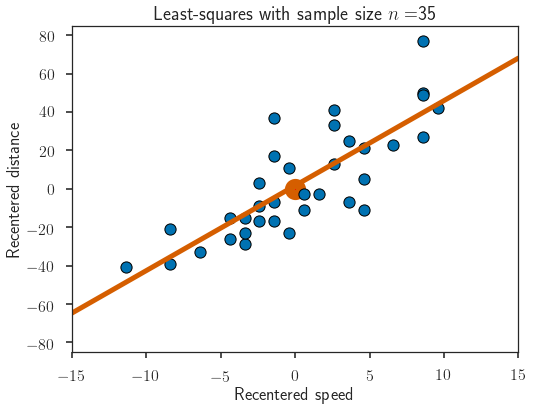

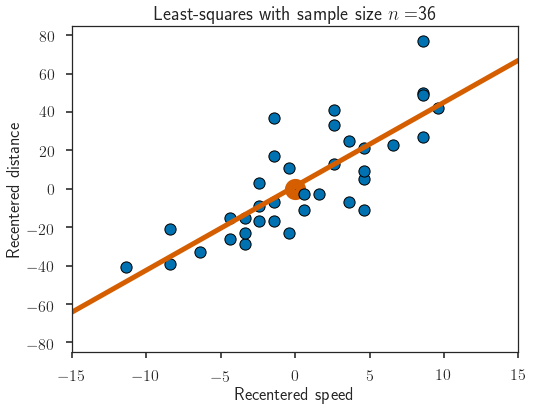

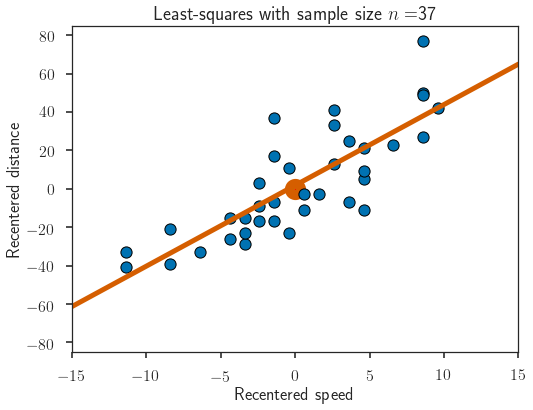

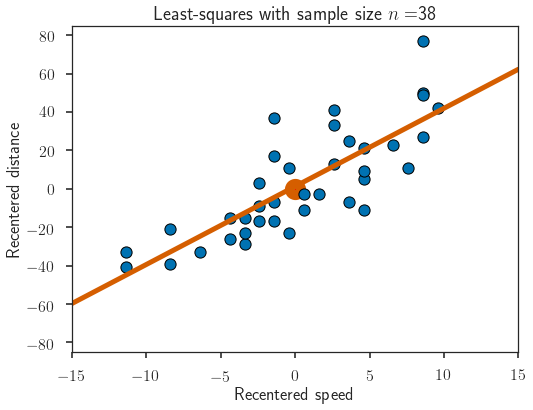

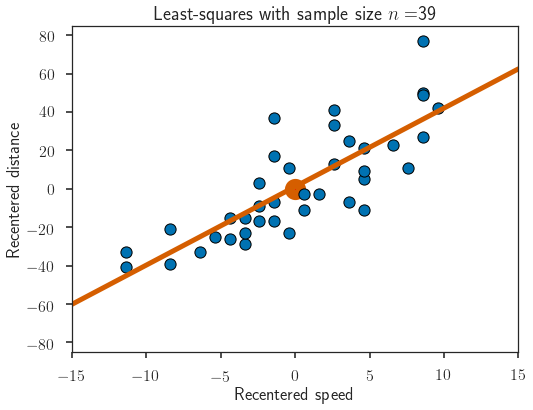

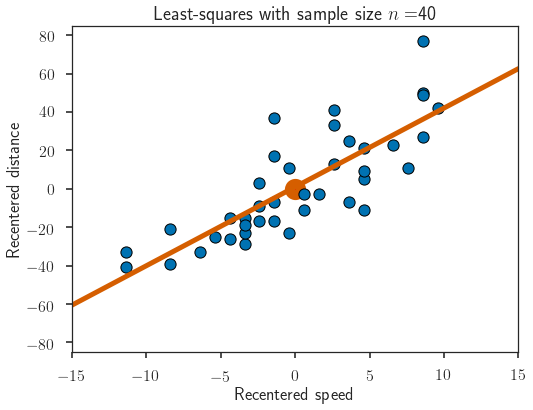

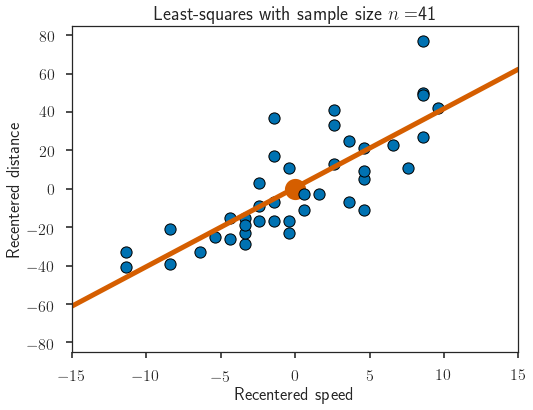

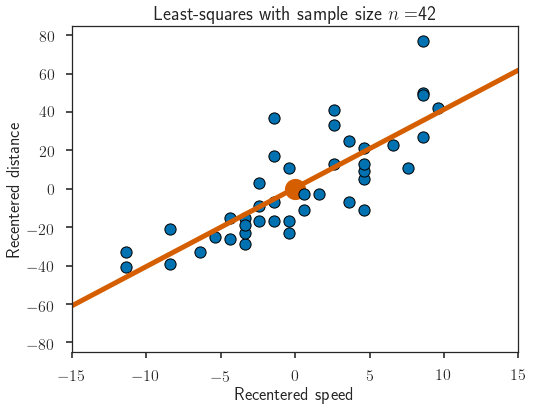

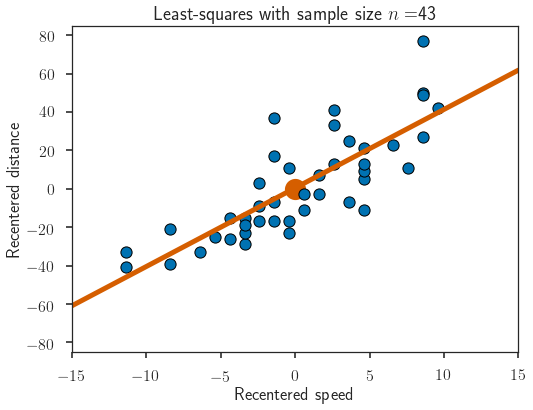

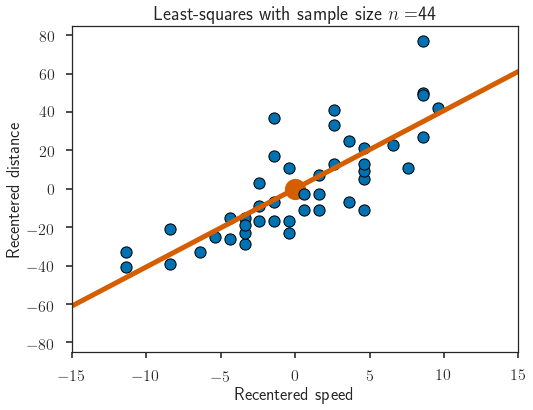

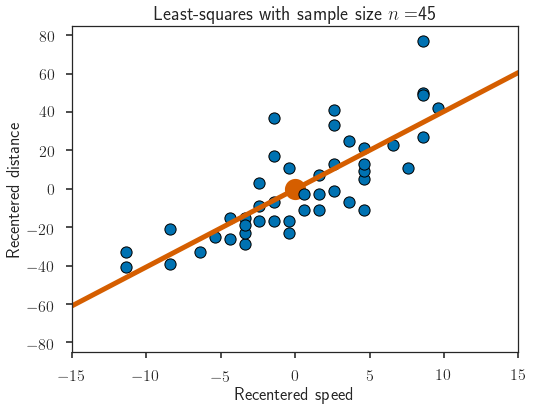

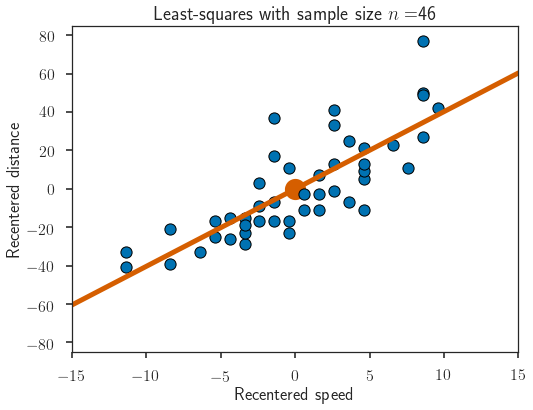

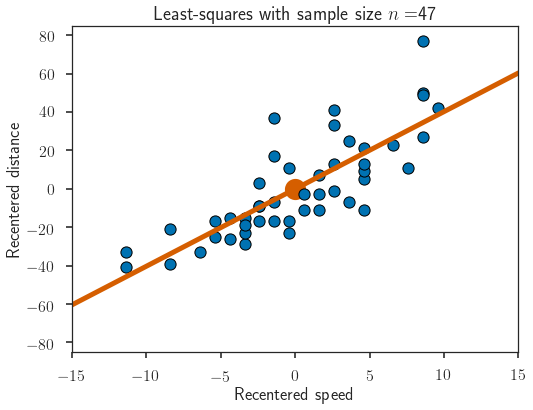

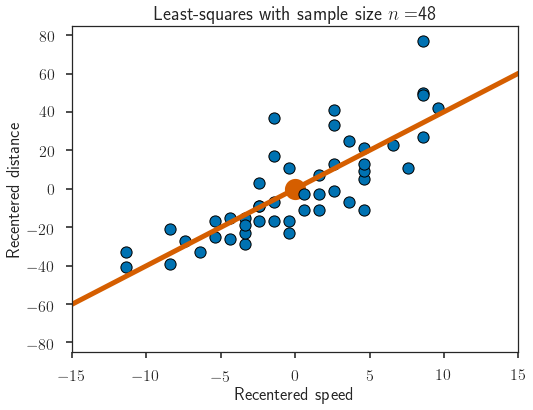

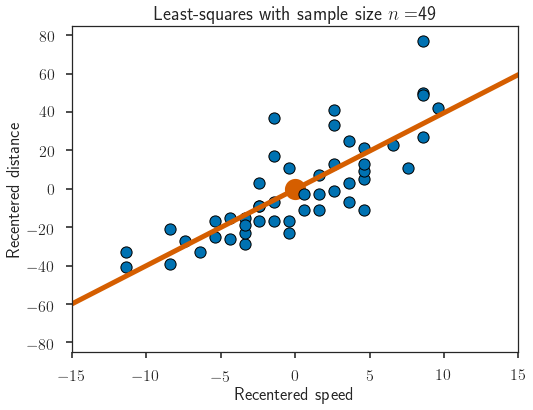

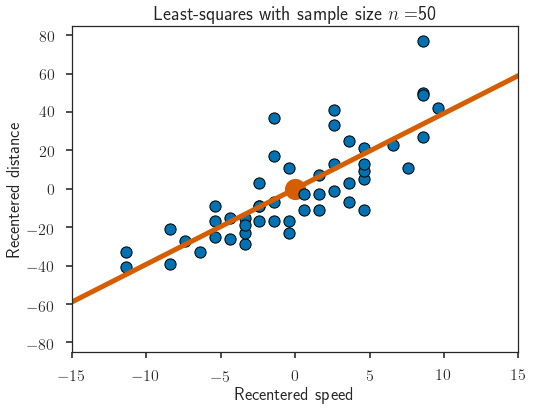

In [26]:
# Start Movie
seed(1)
rnd_index = list(range(n_sample))
shuffle(rnd_index)
for i in range(n_sample):
    fig = plt.figure(figsize=(8, 6))
    plt.xlim(xmin=-15, xmax=15)
    plt.ylim(ymin=-85, ymax=85)
    plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
    y_small = yprime[rnd_index[0:i + 1]]
    X_small = Xprime.iloc[rnd_index[0:i + 1]]
    skl_linmod.fit(X_small, y_small)
    plt.plot(X_small, y_small, 'o', label="Data", markeredgecolor='k',
             markeredgewidth=1, color=my_blue)
    plt.plot(X_to_predict - 15, skl_linmod.predict(X_to_predict - 15),
             color=my_orange, linewidth=5, label="OLS")
    # plt.pause(0.05)
    xlabels = 'Recentered speed'
    ylabels = 'Recentered distance'
    plt.xlabel(xlabels), plt.ylabel(ylabels)
    plt.title('Least-squares with sample size ' + '$ n=$' + str(i + 1))
    plt.show()
    if saving:
        my_saving_display(fig, dirname, "movie" + str(i), imageformat)

# Stack loss dataset

In [27]:
data = sm.datasets.stackloss.load()

In [28]:
X = pd.DataFrame(data.exog, columns=data.exog_name)
y = pd.Series(data.endog)
n_samples, n_features = X.shape

In [29]:
X

,AIRFLOW,WATERTEMP,ACIDCONC
0,80.0,27.0,89.0
1,80.0,27.0,88.0
2,75.0,25.0,90.0
3,62.0,24.0,87.0
4,62.0,22.0,87.0
5,62.0,23.0,87.0
6,62.0,24.0,93.0
7,62.0,24.0,93.0
8,58.0,23.0,87.0
9,58.0,18.0,80.0


# Linear regression: $3\sigma$ rule

In [30]:
skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
res = y - skl_linmod.predict(X)
sigma = np.sqrt( np.sum(res**2)  / (n_samples - n_features) )
t = res / sigma

# res = y - skl_linmod.predict(X)
# # sigma = np.sqrt( np.sum(res**2)  / (n_samples - n_features) )
# MADX = np.median(res)  # mean absolute deviation
# MADNX = MADX / 0.6745 # 0.6745 correponds to sp.stats.norm.ppf(0.75)
# t = res / MADNX
print(t)

0     1.026223
1    -0.608342
2     1.445291
3     1.807679
4    -0.543040
5    -0.953983
6    -0.758091
7    -0.440831
8    -0.997587
9     0.402031
10    0.836393
11    0.881813
12   -0.453226
13   -0.016021
14    0.749185
15    0.287137
16   -0.482220
17   -0.144383
18   -0.189803
19    0.448019
20   -2.296241
dtype: float64


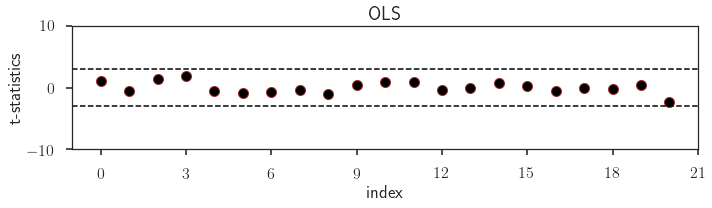

In [32]:
from matplotlib.ticker import MaxNLocator
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(-10, 10)
ax.set_xlim(-1, t.shape[0])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.ylabel(r't-statistics', fontsize=18)
plt.xlabel(r'index', fontsize=18)
ax.axhline(y=3, color='k', lw=1.5, ls="--")
ax.axhline(y=-3, color='k', lw=1.5, ls="--")
plt.title("OLS")
ax.scatter(np.arange(t.shape[0]),t, c='black', s=100, marker='o', edgecolors=brown, lw='1')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig1, dirname, "stackloss_ols_t", imageformat)

# Robust linear regression: $3\sigma$ rule

In [33]:
skl_hub = linear_model.HuberRegressor()
skl_hub.fit(X, y)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [34]:
res = y - skl_hub.predict(X)
sigma = np.sqrt( np.sum(res**2)  / (n_samples - n_features) )
t_hub = res / sigma

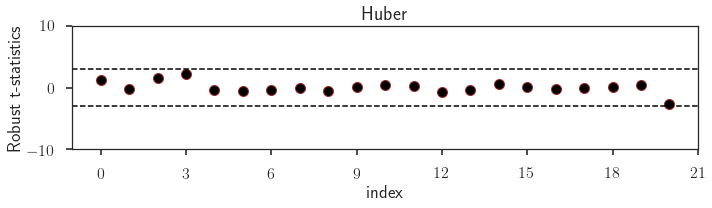

In [35]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(-10, 10)
ax.set_xlim(-1, t.shape[0])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("Huber")
plt.ylabel(r'Robust t-statistics', fontsize=18)
plt.xlabel(r'index', fontsize=18)
ax.axhline(y=3, color='k', lw=1.5, ls="--")
ax.axhline(y=-3, color='k', lw=1.5, ls="--")

ax.scatter(np.arange(t_hub.shape[0]),t_hub, c='black', s=100, marker='o', edgecolors=brown, lw='1')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig1, dirname, "stackloss_hub_t", imageformat)

In [36]:
skl_ransac = linear_model.RANSACRegressor(max_trials=5) #with 100 trials, identical to LTS here
skl_ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=5,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [37]:
res = y - skl_ransac.predict(X)

# MADX = np.median(res)  # mean absolute deviation
MADX = np.median(np.abs(res-np.median(res)))  # mean absolute deviation
MADNX = MADX / 0.6745 # 0.6745 correponds to sp.stats.norm.ppf(0.75)
t_ransac = res / MADNX

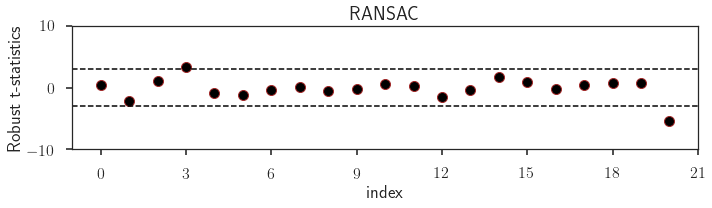

In [38]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(-10, 10)
ax.set_xlim(-1, t.shape[0])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("RANSAC")
plt.ylabel(r'Robust t-statistics', fontsize=18)
plt.xlabel(r'index', fontsize=18)
ax.axhline(y=3, color='k', lw=1.5, ls="--")
ax.axhline(y=-3, color='k', lw=1.5, ls="--")

ax.scatter(np.arange(t_ransac.shape[0]),t_ransac, c='black', s=100, marker='o', edgecolors=brown, lw='1')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig1, dirname, "stackloss_RANSAC_t", imageformat)

In [39]:
skl_TheilSen = linear_model.TheilSenRegressor()
skl_TheilSen.fit(X, y)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [40]:
res = y - skl_TheilSen.predict(X)
MADX = np.median(np.abs(res-np.median(res)))  # mean absolute deviation
MADNX = MADX / 0.6745 # 0.6745 correponds to sp.stats.norm.ppf(0.75)
t_TheilSen = res / MADNX

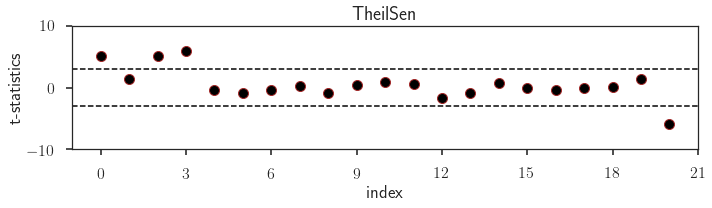

In [41]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(-10, 10)
ax.set_xlim(-1, t.shape[0])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("TheilSen")
plt.ylabel(r't-statistics', fontsize=18)
plt.xlabel(r'index', fontsize=18)
ax.axhline(y=3, color='k', lw=1.5, ls="--")
ax.axhline(y=-3, color='k', lw=1.5, ls="--")

ax.scatter(np.arange(t_TheilSen.shape[0]),t_TheilSen, c='black', s=100, marker='o', edgecolors=brown, lw='1')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig1, dirname, "stackloss_TheilSen_t", imageformat)

In [42]:
# obtained with priceless help from Olivier Grisel
# rpy2 is available via pip: pip install rpy2
from rpy2 import robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects import numpy2ri
from rpy2.robjects import pandas2ri

numpy2ri.activate()
pandas2ri.activate()

utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)  # select the first mirror in the list
if not rpackages.isinstalled('robustbase'):
    utils.install_packages("robustbase")
ltsReg = rpackages.importr('robustbase')

ltsReg = robjects.r['ltsReg']
ltsReg_fit = ltsReg(X, y)
ltsReg_fit_dict = dict(zip(ltsReg_fit.names, list(ltsReg_fit)))
print("returned values: ", ltsReg_fit_dict.keys())

as_matrix = robjects.r['as']

# getting coefs:
raw_coef = robjects.r.coef(ltsReg_fit)
coefs = np.array(as_matrix(raw_coef, "matrix"))

# getting some other results:
res = np.array(as_matrix(ltsReg_fit_dict["residuals"], "matrix"))
MADX = np.median(np.abs(res-np.median(res)))  # mean absolute deviation
MADNX = MADX / 0.6745 # 0.6745 correponds to sp.stats.norm.ppf(0.75)
t_LTS = res / MADNX


returned values:  dict_keys(['alpha', 'raw.weights', 'best', 'raw.coefficients', 'quan', 'raw.scale', 'raw.resid', 'coefficients', 'scale', 'resid', 'crit', 'rsquared', 'method', 'intercept', 'RD', 'lts.wt', 'residuals', 'fitted.values', 'Y', 'X', 'raw.cnp2', 'cnp2', 'call'])


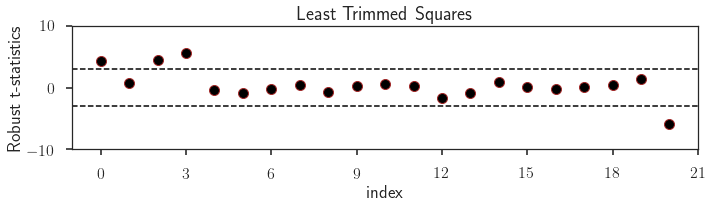

In [43]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(-10, 10)
ax.set_xlim(-1, t.shape[0])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("Least Trimmed Squares")
plt.ylabel(r'Robust t-statistics', fontsize=18)
plt.xlabel(r'index', fontsize=18)
ax.axhline(y=3, color='k', lw=1.5, ls="--")
ax.axhline(y=-3, color='k', lw=1.5, ls="--")

ax.scatter(np.arange(t_LTS.shape[0]),t_LTS, c='black', s=100, marker='o', edgecolors=brown, lw='1')
plt.tight_layout()
plt.show()

if saving:
    my_saving_display(fig1, dirname, "stackloss_LTS_t", imageformat)

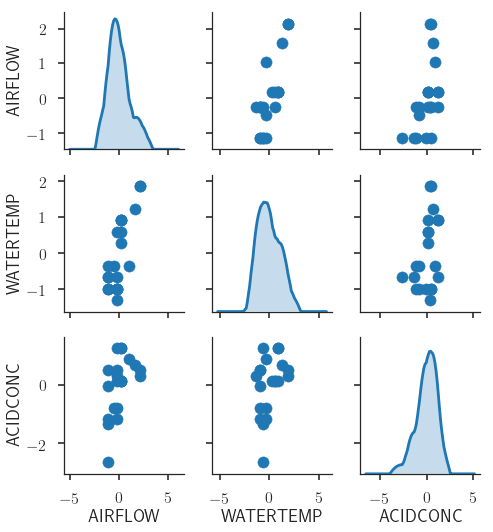

In [44]:
g = sns.PairGrid((X - X.mean()) / X.std(), palette="colorblind")
# g = sns.PairGrid(X, palette="colorblind")
g.map_upper(plt.scatter, cmap="Blues_d")
g.map_lower(plt.scatter, cmap="Blues_d")

g.fig.subplots_adjust(left=0.08, right=0.85)
g.map_diag(sns.kdeplot, bw=1.3,kernel='epa', shade=True, legend=False)
